In [1]:
from pathlib import Path
import sys
 
if sys.argv:
    sys.path.insert(0, str(Path('/Users/ogrobertino/UpliftModelingResearch/').resolve()))
%load_ext autoreload
%autoreload 2

from src.global_params import BASE_PATH
import pandas as pd
    
# from src.models.ICausalML.Models import XModel
# model = XModel(from_load=True, path = str(BASE_PATH) + "/" + path)

In [3]:
table = pd.read_csv(BASE_PATH + "/exps/stats.tsv", sep='\t')

In [4]:
from src.models.CausalML.Models import XModel, TModel, SModel, DRModel

Failed to import duecredit due to No module named 'duecredit'


In [5]:
def best_models(class_name_need):
    models = []
    i = 0
    j=0
    best = table[table.Model == class_name_need].sort_values(by=['AUUC (test)'], ascending=False)
    while i < 5:
        class_name = best['Model'].iloc[j]
        path = best['Path'].iloc[j]
        index = best['Path'].reset_index().iloc[j]['index']
        if class_name_need == 'XModel':
            if index < 29:
                j+=1
                continue
        models.append(globals()[class_name](from_load=True, path=str(BASE_PATH) + '/' + path))
        i+=1
        j+=1
    return models

In [6]:
models_t = best_models('TModel')
models_s = best_models('SModel')
models_x = best_models('XModel')
models_dr = best_models('DRModel')

Model loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/21/model.pkl.
Config loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/21/config.json.
Model loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/92/model.pkl.
Config loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/92/config.json.
Model loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/1/model.pkl.
Config loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/1/config.json.
Model loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/2/model.pkl.
Config loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/2/config.json.
Model loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/9/model.pkl.
Config loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/9/config.json.
Model loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/61/model.pkl.
C

In [7]:
import numpy as np
importances  = np.zeros(models_s[0].model.models[1].feature_importances_.shape)

In [8]:
improtances_s = []
for model in models_s:
    improtances_s.append(model.model.models[1].feature_importances_[:-1])

improtances_t = []
for model in models_t:
    improtances_t.append(model.model.models_c[1].feature_importances_)
    improtances_t.append(model.model.models_t[1].feature_importances_)

importances_x = []
for model in models_x:
    importances_x.append(model.model.models_tau_t[1].feature_importances_)
    importances_x.append(model.model.models_tau_c[1].feature_importances_)
    importances_x.append(model.model.models_mu_c[1].feature_importances_)
    importances_x.append(model.model.models_mu_t[1].feature_importances_)

importances_dr = []
for model in models_dr:
    importances_dr.append(model.model.models_mu_c[0].feature_importances_)
    importances_dr.append(model.model.models_mu_c[1].feature_importances_)
    importances_dr.append(model.model.models_mu_c[2].feature_importances_)

    importances_dr.append(model.model.models_mu_t[1][0].feature_importances_)
    importances_dr.append(model.model.models_mu_t[1][1].feature_importances_)
    importances_dr.append(model.model.models_mu_t[1][2].feature_importances_)

    importances_dr.append(model.model.models_tau[1][0].feature_importances_)
    importances_dr.append(model.model.models_tau[1][1].feature_importances_)
    importances_dr.append(model.model.models_tau[1][2].feature_importances_)

In [9]:
importances = np.vstack([improtances_s, improtances_t, importances_x, importances_dr])

In [10]:
importances_norm = importances.sum(axis=0) / importances.sum()

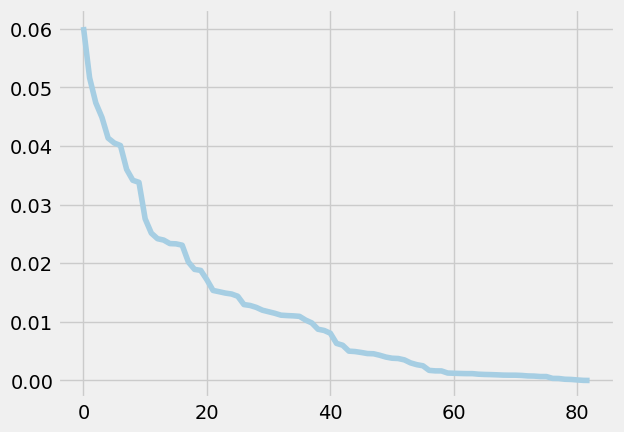

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.sort(importances_norm)[::-1])

In [12]:
np.argsort(importances_norm)[::-1]

array([24,  1,  2, 20, 12, 21, 29, 77, 79, 22, 15, 45, 76, 32, 31, 10, 19,
       13, 80, 81, 78, 16,  8, 14,  5, 28,  4, 23, 26, 30, 34,  0, 27, 82,
       18, 25, 49,  9, 54,  3, 11, 17, 65, 63, 55,  6, 33, 64,  7, 56, 37,
       67, 35, 38, 48, 36, 39, 57, 61, 59, 52, 70, 62, 71, 53, 58, 75, 72,
       51, 66, 40, 69, 73, 41, 74, 50, 42, 43, 44, 60, 46, 47, 68])

In [18]:
importances_norm[np.argsort(importances_norm)[::-1]][:83]

array([6.02939886e-02, 5.16346454e-02, 4.73680563e-02, 4.48843829e-02,
       4.13509403e-02, 4.05057333e-02, 4.00794081e-02, 3.60055543e-02,
       3.41538669e-02, 3.37983701e-02, 2.75814835e-02, 2.51352989e-02,
       2.41874441e-02, 2.39521636e-02, 2.33543993e-02, 2.33085186e-02,
       2.30804771e-02, 2.02141082e-02, 1.89540669e-02, 1.87806506e-02,
       1.71834587e-02, 1.53605937e-02, 1.51404116e-02, 1.49083000e-02,
       1.47513065e-02, 1.43699245e-02, 1.29520428e-02, 1.27983258e-02,
       1.24708591e-02, 1.19886880e-02, 1.17265292e-02, 1.14637904e-02,
       1.11434126e-02, 1.10726139e-02, 1.10244627e-02, 1.09432532e-02,
       1.03007610e-02, 9.82017663e-03, 8.74459361e-03, 8.53276881e-03,
       8.06310155e-03, 6.33082351e-03, 6.01323350e-03, 5.01067178e-03,
       4.93808564e-03, 4.78161737e-03, 4.59687143e-03, 4.55890055e-03,
       4.30707051e-03, 3.99735961e-03, 3.80006343e-03, 3.74903276e-03,
       3.51349809e-03, 3.00301871e-03, 2.69909457e-03, 2.51035823e-03,
      

In [21]:
importances_norm[np.argsort(importances_norm)[::-1]][:40]

array([0.06029399, 0.05163465, 0.04736806, 0.04488438, 0.04135094,
       0.04050573, 0.04007941, 0.03600555, 0.03415387, 0.03379837,
       0.02758148, 0.0251353 , 0.02418744, 0.02395216, 0.0233544 ,
       0.02330852, 0.02308048, 0.02021411, 0.01895407, 0.01878065,
       0.01718346, 0.01536059, 0.01514041, 0.0149083 , 0.01475131,
       0.01436992, 0.01295204, 0.01279833, 0.01247086, 0.01198869,
       0.01172653, 0.01146379, 0.01114341, 0.01107261, 0.01102446,
       0.01094325, 0.01030076, 0.00982018, 0.00874459, 0.00853277])

In [22]:
train_data = pd.read_csv('../data/trash/lazada/full_trainset.csv')
test_data = pd.read_csv('../data/trash/lazada/full_testset.csv')

In [23]:
train_data['target'] = train_data['label']
train_data['treatment'] = train_data['is_treat']
test_data['target'] = test_data['label']
test_data['treatment'] = test_data['is_treat']

In [24]:
train_data = train_data.drop(['data_id', 'label', 'is_treat'],axis=1)
test_data = test_data.drop(['data_id', 'label', 'is_treat'],axis=1)

In [25]:
need_cols = sorted([f'f{x}' for x in np.argsort(importances_norm)[::-1][:40]])

In [26]:
train_data = train_data.loc[:, [*need_cols, *['target', 'treatment']]]
test_data = test_data.loc[:, [*need_cols, *['target', 'treatment']]]

In [27]:
BASE_PATH

'/Users/ogrobertino/UpliftModelingResearch'

In [28]:
from src.datasets import sample_features
percents = [100, 50]
sample_features(percents, train_data, test_data, str(BASE_PATH) + '/data/lazada2')